# Analýza datasetu EMNIST 
EMNIST (Extended MNIST) je referenčný dataset obsahujúci ručne písané číslice a písmená. Vznikol ako rozšírenie datasetu MNIST. Je veľmi často využívaný pri trénovaní obraz-spracujúcich systémov, pričom jadrom tohto využitia je strojové učenie. Jeho autormi sú Gregory Cohen, Saeed Afshar, Jonathan Tapson, Andre van Schaik-The MARCS Institute for Brain, Behaviour and Development.
#### <span style="color: blue;">Štruktúra:</span>
Dataset je celkovo tvorený 6 datasetmi obsahujúcimi rukou písané číslice, písmena a ich kombinácie: 
* EMNIST Balanced Dataset
* EMNIST By_Merge Dataset
* EMNIST By_Class Dataset
* EMNIST Letters Dataset
* EMNIST MNIST Dataset
* __EMNIST Digits Dataset__

V tejto konkrétnej analýze sme sa zamerali na podmnožinu EMNIST Digits Dataset.
Podmnožina je tvorená trénovacou a testovaciou sadou dát. Trénovacia sada obsahuje 240 000 vzoriek rukou písaných číslic. Testovacia sada naproti tomu obsahuje 40 000 vzoriek rukou písaných číslic.
#### <span style="color: blue;">Formát vzorky:</span>
Vzorky číslic datasetu majú veľkosť 28x28 pixelov a farebný formát grayscale, teda každý pixel vzorky obsahuje hodnotu reprezentujúcu intenzitu svetla.
#### <span style="color: blue;">Pôvod:</span>
Dataset EMNIST bol vytvorený v roku 2017 ako rozšírenie referenčného datasetu MNIST z pôvodného datasetu NIST Special Database 19, ktorý bol vytvorený medzi zamestnancami americkej federálnej agentúry Census Bureau a študentami amerických stredných škôl.
<br>Bol vytvorený zmiešaním dát z NIST SD-1 a NIST SD-3 a naśledne ich rozšírením (deformácia, rotácia, prevrátenie...) v trénovacej a testovacej sade.
<br>Vzorky vznikli aplikovaním metódy na zjemnenie hrán (Gaussian Blur) na pôvodné vzorky datasetu NIST veľkosti 128x128, následne z nich boli vybraté samotné symboly pomocou obdĺžnikového výberu (ROI Extraction), vycentrované do rámca štvorcovej veľkosti a následne zmenšené na finálnu veľkosť 28x28.

---
## Importovanie modulov:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#príkaz umožnujúci embedded inline kompiláciu modulu matplotlib
%matplotlib inline

---
## Importovanie datasetu:
Na analýzu je potrebné dataset importovať do premennej typu pandas.DataFrame. Do premennej ___emnist_train_df___ sme importovali trénovaciu a do premennej ___emnist_test_df___ testovaciu časť datasetu. Nakoľko v našom prípade je pôvodný dataset typu .csv (Comma-separated value) a neobsahuje popisy stĺpcov, je na import použitý konštruktor read_csv s parametrom header inicializovaným na hodnotu None. 

In [2]:
#inicializácia DataFrame-u zo súboru typu .csv
emnist_train_df = pd.read_csv("/Users/filipeno1/Downloads/Bakalarska_praca/Datasety/EMNIST/emnist-digits-train.csv", header=None)
emnist_test_df = pd.read_csv("/Users/filipeno1/Downloads/Bakalarska_praca/Datasety/EMNIST/emnist-digits-test.csv", header=None)

---
## Štruktúra datasetu:
Dataset pozostáva z 785 stĺpcov, prvý obsahuje informáciu v nominálnej kategorickej premennej, o ktorú číslicu sa jedná <0; 9>, zvyšných 784 obsahuje informáciu v diskrétnej kvantitatívnej premennej o jednotlivých pixeloch <0; 255> danej číslice pri rozmere mriežky 28x28px. Štruktúra datasetu je pri jeho trénovacej aj testovacej časti zhodna. Trénovacia časť pozostáva z 240 000 riadkov (vzoriek), testovacia z 40 000 riadkov.

#### <span style="color: blue;">Trénovacie dáta:</span>

In [3]:
emnist_train_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239996,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### <span style="color: blue;">Testovacie dáta:</span>

In [4]:
emnist_test_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39996,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39997,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39998,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---
## Vizualizácia vzoriek dát (číslic):
Na vizualizáciu dát je potrebné previesť dataset z premennej ___emnist_train_df___ typu pandas.DataFrame na premennú ___data___ typu numpy.array.
<br>Z premennej ___data___ vymažeme prvý stĺpec s označením danej číslice, a uložíme ho do samostatnej premennej ___target___.
<br>Do premennej ___img_1___ po preformatovaní na rozmer 28x28 uložíme dáta reprezentujúce číslicu.

In [5]:
#inicializácia matice z DataFrame-u
data = np.array(emnist_train_df)

#uloženie informácie o príslušnosti vzorky k číslu 0 až 9 do samostatnej premennej
target = data[:, 0]
#vymzanie informácie o príslušnosti vzorky k číslu 0 až 9 z pôvodnej premennej
data = np.delete(data, 0, 1)

#uloženie a preformátovanie dát reprezentujúcich prvú číslicu do samostatnej premennej
img_1 = data[28].reshape(28, 28)

In [6]:
print(f"Label: {target[28]}")
print(img_1)

Label: 4
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   3   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3
   34  99  33   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   5  83
  175 237 158  20   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 230
  249 252 220  50   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   2  25 171 232
  104 148 245 124   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  

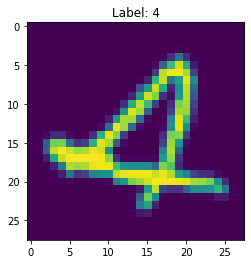

In [7]:
#vizualizácia bez použitia dodatočného filtru
plt.title(f"Label: {target[28]}")
plt.imshow(img_1)

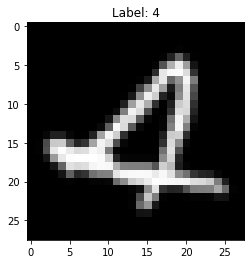

In [8]:
#vizualizácia s použitím čiernobieleho filtra "gray"
plt.title(f"Label: {target[28]}")
plt.imshow(img_1, cmap="gray")

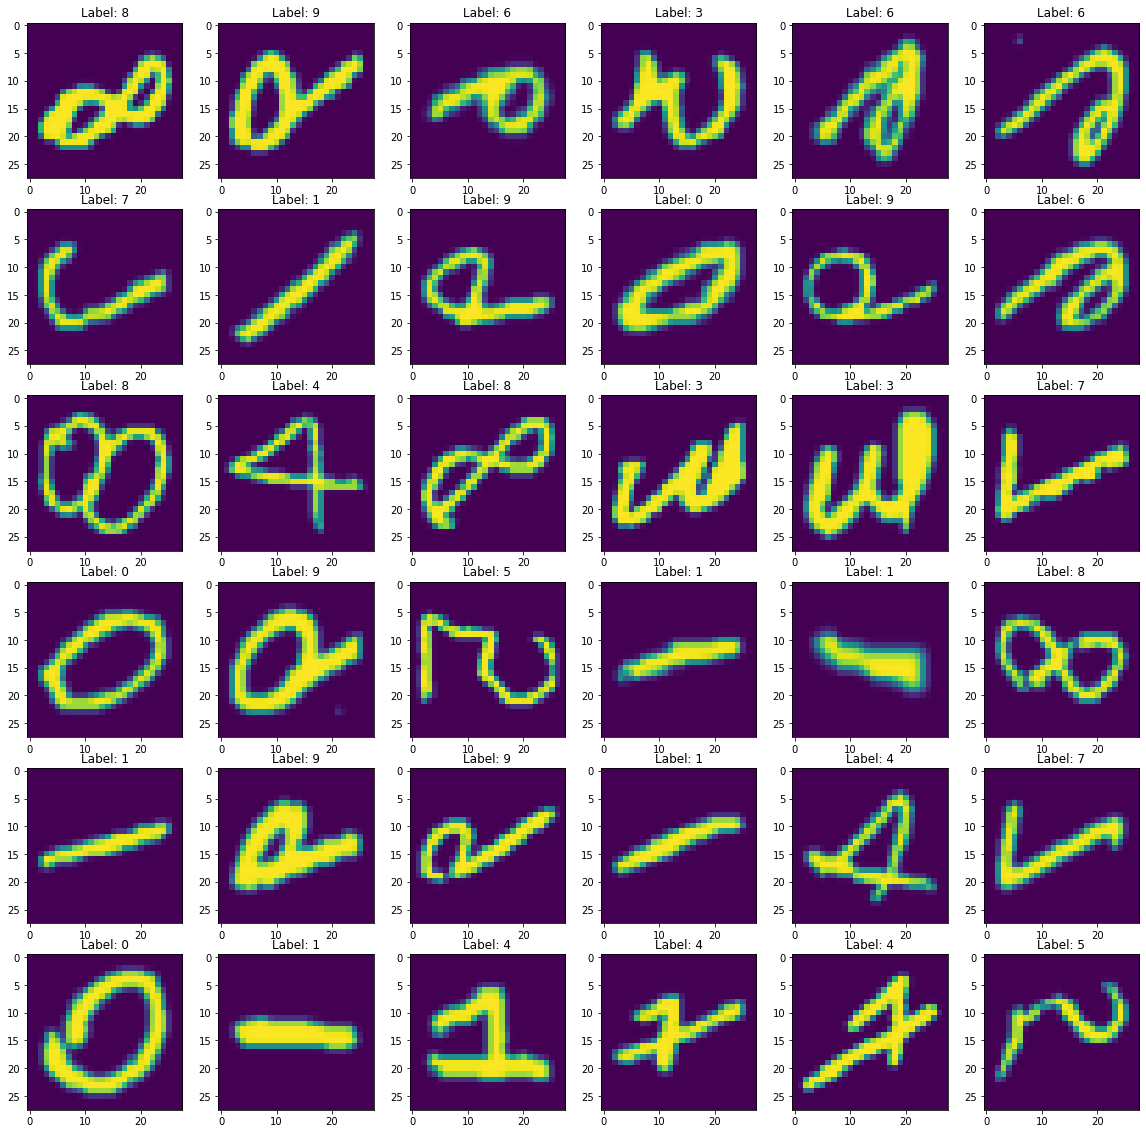

In [9]:
#vizualizácia v mriežke bez použitia dodatočného filtru
f, axarr = plt.subplots(6, 6, figsize=(20,20))
counter = 0

for i in range(0, 6):
    for j in range(0, 6):
        axarr[i, j].set_title(f"Label: {target[counter]}")
        axarr[i, j].imshow(data[counter].reshape(28, 28))
        counter += 1

---
## Rozbor datasetu:
Pri datasetoch určených na použitie pri strojovom učení je dôležitá ich vhodná robustnosť a škálovanie, ktoré dokážu pri vhodnej optimalizácii daného systému (neurónová sieť...) maximalizovať úspešnosť klasifikácie a minimalizovať trénovaci čas.
<br>Nakoľko EMNIST vychádza z referenčného datasetu MNIST, tak jeho tŕenovacia aj testovacia časť obsahuje absolútne rovnomerný počet vzoriek.

#### <span style="color: blue;">Trénovacie dáta:</span>

Text(0.5, 0.98, 'Početnosť vzoriek číslic v trénovacom datasete')

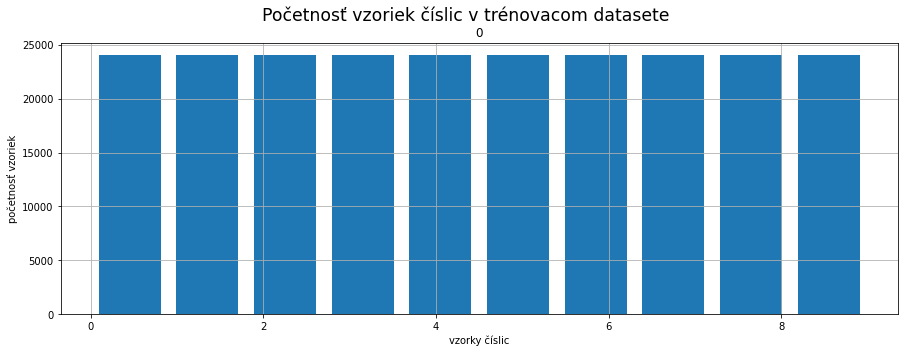

In [10]:
#zobrazenie histogramu zo zvolených údajov (0-tý stĺpec)
emnist_train_df.hist(column=0, figsize=(15, 5), rwidth=0.8)
#nastavenie pomenovania x-ovej osi grafu
plt.xlabel("vzorky číslic")
#nastavenie pomenovania y-ovej osi grafu
plt.ylabel("početnosť vzoriek")
#nastavenie názvu grafu
plt.suptitle("Početnosť vzoriek číslic v trénovacom datasete", ha="center", fontsize="xx-large")

In [11]:
print("Početnosť vzoriek číslic v trénovacom datasete:")
sum_of_count = 0
for i in range(0,10):
    count = emnist_train_df[emnist_train_df[0]==i].shape[0]
    sum_of_count += count
    print(f" - počet vzoriek čísla {i}: {count}")
avrg = sum_of_count/(i+1)
print(f"\nPriemerný počet vzoriek: {avrg}")

Početnosť vzoriek číslic v trénovacom datasete:
 - počet vzoriek čísla 0: 24000
 - počet vzoriek čísla 1: 24000
 - počet vzoriek čísla 2: 24000
 - počet vzoriek čísla 3: 24000
 - počet vzoriek čísla 4: 24000
 - počet vzoriek čísla 5: 24000
 - počet vzoriek čísla 6: 24000
 - počet vzoriek čísla 7: 24000
 - počet vzoriek čísla 8: 24000
 - počet vzoriek čísla 9: 24000

Priemerný počet vzoriek: 24000.0


#### <span style="color: blue;">Testovacie dáta:</span>

Text(0.5, 0.98, 'Početnosť vzoriek číslic v testovacom datasete')

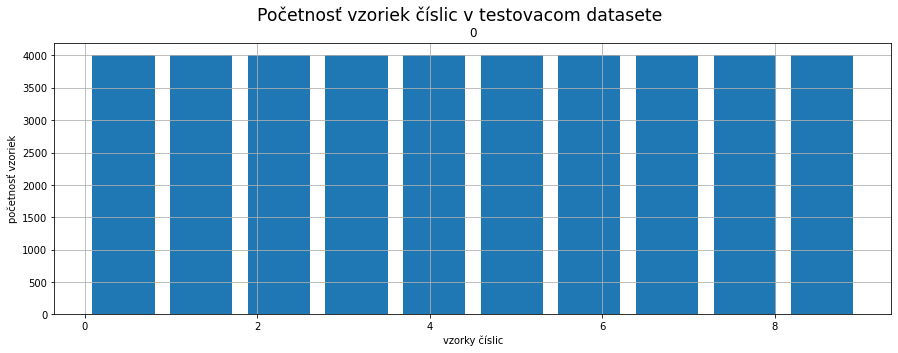

In [12]:
#zobrazenie histogramu zo zvolených údajov (0-tý stĺpec)
emnist_test_df.hist(column=0, figsize=(15, 5), rwidth=0.8)
#nastavenie pomenovania x-ovej osi grafu
plt.xlabel("vzorky číslic")
#nastavenie pomenovania y-ovej osi grafu
plt.ylabel("početnosť vzoriek")
#nastavenie názvu grafu
plt.suptitle("Početnosť vzoriek číslic v testovacom datasete", ha="center", fontsize="xx-large")

In [13]:
print("Početnosť vzoriek číslic v testovacom datasete:")
sum_of_count = 0
for i in range(0,10):
    count = emnist_test_df[emnist_test_df[0]==i].shape[0]
    sum_of_count += count
    print(f" - počet vzoriek čísla {i}: {count}")
avrg = sum_of_count/(i+1)
print(f"\nPriemerný počet vzoriek: {avrg}")

Početnosť vzoriek číslic v testovacom datasete:
 - počet vzoriek čísla 0: 4000
 - počet vzoriek čísla 1: 4000
 - počet vzoriek čísla 2: 4000
 - počet vzoriek čísla 3: 4000
 - počet vzoriek čísla 4: 4000
 - počet vzoriek čísla 5: 4000
 - počet vzoriek čísla 6: 4000
 - počet vzoriek čísla 7: 4000
 - počet vzoriek čísla 8: 4000
 - počet vzoriek čísla 9: 4000

Priemerný počet vzoriek: 4000.0


#### <span style="color: blue;">Pomer trénovacích a testovacích dát:</span>

Text(0.5, 0.98, 'Pomer početnosti vzoriek číslic v trénovacom a testovacom datasete')

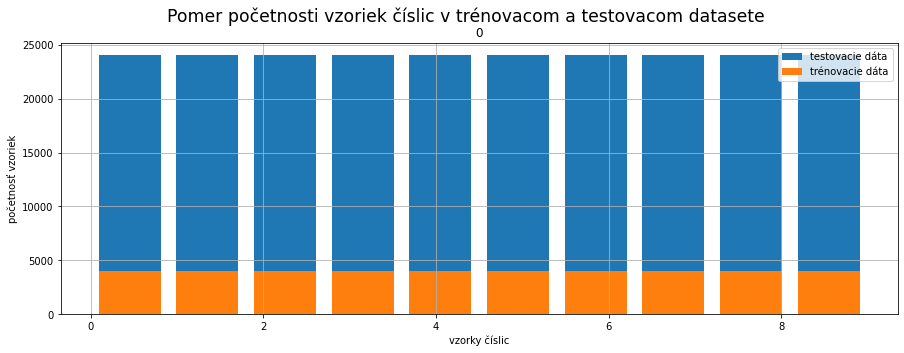

In [19]:
#zobrazenie histogramu zo zvolených údajov (0-tý stĺpec)
ax = emnist_train_df.hist(column=0, figsize=(15, 5), rwidth=0.8)
emnist_test_df.hist(ax=ax, column=0, figsize=(15, 5), rwidth=0.8)
#nastavenie legendy
plt.legend(["testovacie dáta", "trénovacie dáta"])
#nastavenie pomenovania x-ovej osi grafu
plt.xlabel("vzorky číslic")
#nastavenie pomenovania y-ovej osi grafu
plt.ylabel("početnosť vzoriek")
#nastavenie názvu grafu
plt.suptitle("Pomer početnosti vzoriek číslic v trénovacom a testovacom datasete", ha="center", fontsize="xx-large")

In [16]:
print("Pomer početnosti vzoriek číslic v trénovacom a testovacom datasete (trénovacie dáta/testovacie dáta):")
for i in range(0,10):
    train_count = emnist_train_df[emnist_train_df[0]==i].shape[0]
    test_count = emnist_test_df[emnist_test_df[0]==i].shape[0]
    print(f" - počet vzoriek čísla {i}: {train_count}/{test_count}")

Pomer početnosti vzoriek číslic v trénovacom a testovacom datasete (trénovacie dáta/testovacie dáta):
 - počet vzoriek čísla 0: 24000/4000
 - počet vzoriek čísla 1: 24000/4000
 - počet vzoriek čísla 2: 24000/4000
 - počet vzoriek čísla 3: 24000/4000
 - počet vzoriek čísla 4: 24000/4000
 - počet vzoriek čísla 5: 24000/4000
 - počet vzoriek čísla 6: 24000/4000
 - počet vzoriek čísla 7: 24000/4000
 - počet vzoriek čísla 8: 24000/4000
 - počet vzoriek čísla 9: 24000/4000


---
## Zdroje:

Cohen, G., Afshar, S., Tapson, J., & van Schaik, A. (2017). EMNIST: an extension of MNIST to handwritten letters.